## Methods to correct an imbalanced dataset 
#### The following jupyter notebook accompanies the seminar paper "Methods to correct an imbalanced dataset" by Johannes Winkler. It generates an imbalanced dataset using the sci-kit learn library and visualizes the result after applying various resampling methods to the data.

In [1]:
# load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from numpy import where

In [2]:
# define random state
random_state = 42

In [3]:
# assign colour to label
def define_color(label):
    if label == 0:
         colors = '#1f77b4' #blue
    elif label == 1:
        colors = '#2ca02c' #greenn
    else:
        colors = '#ff7f0e' #orange
    return colors

In [4]:
# define the style of the following graphics
sns.set_style("darkgrid")

In [5]:
# generate original data set
# number of observations = 10000
# number of classes = 3
# number of features each data points consists of = 3
# number of cluster per class = 3
# size of each cluster: class= 0 : 90%, class = 1: 5%, class = 2: 5%
# flip_y = 1% defines error rate in class assignment, makes classifcation task more interesting
X, y = make_classification(n_samples=10000,\
                        n_features=3, n_redundant=0,\
                        n_classes=3, n_clusters_per_class=1,\
                        weights=[0.9, 0.05, 0.05 ], flip_y=0.01, random_state=random_state)

In [6]:
# original data
counter_original = Counter(y)

In [7]:
# define the undersampling method RUS
undersample_rus = RandomUnderSampler(random_state=random_state)
# transform the dataset
rus_X, rus_y = undersample_rus.fit_resample(X, y)

In [8]:
# define the undersampling method ENN
undersample_ENN = EditedNearestNeighbours()
# transform the dataset
enn_X, enn_y = undersample_ENN.fit_resample(X, y)

In [9]:
# define the undersampling method TomekLinks
undersample_TL = TomekLinks()
# transform the dataset
tom_X, tom_y = undersample_TL.fit_resample(X, y)

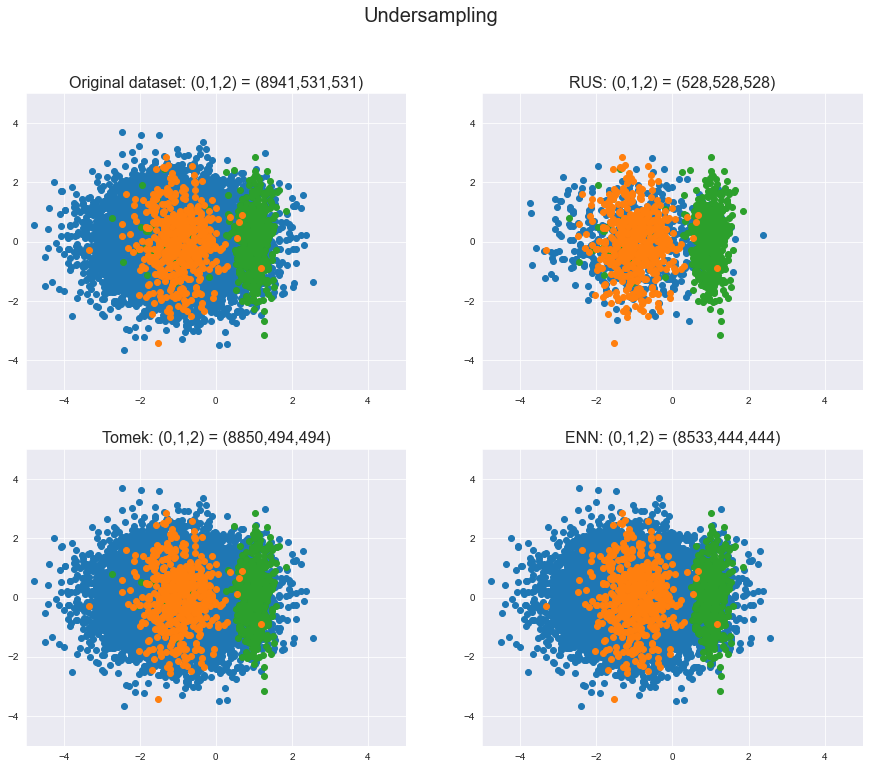

In [10]:
# plot all 4 methods in one graph

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Undersampling', fontsize=20)

for label, _ in counter_original.items():
    row_ix = where(y == label)[0]
    colors = define_color(label)
    axs[0, 0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), c=colors)
axs[0, 0].set_title('Original dataset: (0,1,2) = (' + str(counter_original[0])+','+ str(counter_original[1])+','+str(counter_original[1])+')',fontsize=16)
axs[0, 0].set_ylim(-5, 5)
axs[0, 0].set_xlim(-5, 5)

counter = Counter(rus_y)
for rus_label, _ in counter.items():
    row_ix = where(rus_y == rus_label)[0]
    colors = define_color(rus_label)
    axs[0, 1].scatter(rus_X[row_ix, 0], rus_X[row_ix, 1], label=str(rus_label), c=colors)
axs[0, 1].set_title('RUS: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[0, 1].set_ylim(-5, 5)
axs[0, 1].set_xlim(-5, 5)

counter = Counter(tom_y)
for tom_label, _ in counter.items():
    tom_ix = where(tom_y == tom_label)[0]
    colors = define_color(tom_label)
    axs[1, 0].scatter(tom_X[tom_ix, 0], tom_X[tom_ix, 1], label=str(tom_label), c=colors)
axs[1, 0].set_title('Tomek: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[1, 0].set_ylim(-5, 5)
axs[1, 0].set_xlim(-5, 5)

counter = Counter(enn_y)
for enn_label, _ in counter.items():
    row_ix = where(enn_y == enn_label)[0]
    colors = define_color(enn_label)
    axs[1, 1].scatter(enn_X[row_ix, 0], enn_X[row_ix, 1], label=str(enn_label), c=colors)
axs[1, 1].set_title('ENN: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[1, 1].set_ylim(-5, 5)
axs[1, 1].set_xlim(-5, 5)

#plt.show()
# save graphic
plt.savefig('Undersampling')

In [11]:
### Oversampling ###

In [12]:
# define the oversampling method SMOTE
oversample = SMOTE()
smo_X, smo_y = oversample.fit_resample(X, y)

In [13]:
# define the oversampling method ADASYN
oversample = ADASYN()
ada_X, ada_y = oversample.fit_resample(X, y)

In [14]:
### Combination of over- and under-sampling ###

In [15]:
# define the combination method SMOTETomek
oversample = SMOTETomek()
SMO_TOM_X, SMO_TOM_y = oversample.fit_resample(X, y)

In [16]:
# define the combination method SMOTE-ENN
oversample = SMOTEENN(random_state=42)
sme_X, sme_y = oversample.fit_resample(X, y)

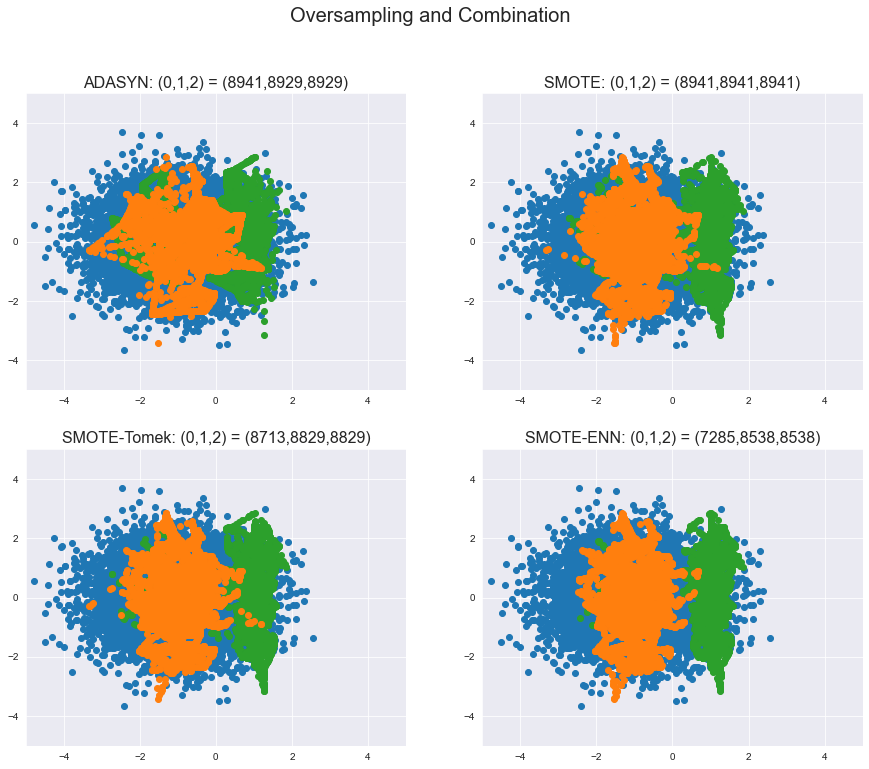

In [17]:
# plot all 4 methods in one graph

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Oversampling and Combination', fontsize=20)

counter = Counter(ada_y)
for ada_label, _ in counter.items():
    row_ix = where(ada_y == ada_label)[0]
    colors = define_color(ada_label)
    axs[0, 0].scatter(ada_X[row_ix, 0], ada_X[row_ix, 1], label=str(ada_label), c=colors)
axs[0, 0].set_title('ADASYN: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[0, 0].set_ylim(-5, 5)
axs[0, 0].set_xlim(-5, 5)

counter = Counter(smo_y)
for smo_label, _ in counter.items():
    row_ix = where(smo_y == smo_label)[0]
    colors = define_color(smo_label)
    axs[0, 1].scatter(smo_X[row_ix, 0], smo_X[row_ix, 1], label=str(smo_label), c=colors)
axs[0, 1].set_title('SMOTE: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[0, 1].set_ylim(-5, 5)
axs[0, 1].set_xlim(-5, 5)


counter = Counter(SMO_TOM_y)
for SMO_TOM_label, _ in counter.items():
    tom_ix = where(SMO_TOM_y == SMO_TOM_label)[0]
    colors = define_color(SMO_TOM_label)
    axs[1, 0].scatter(SMO_TOM_X[tom_ix, 0], SMO_TOM_X[tom_ix, 1], label=str(SMO_TOM_label), c=colors)
axs[1, 0].set_title('SMOTE-Tomek: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[1, 0].set_ylim(-5, 5)
axs[1, 0].set_xlim(-5, 5)

counter = Counter(sme_y)
for sme_label, _ in counter.items():
    row_ix = where(sme_y == sme_label)[0]
    colors = define_color(sme_label)
    axs[1, 1].scatter(sme_X[row_ix, 0], sme_X[row_ix, 1], label=str(sme_label), c=colors)
axs[1, 1].set_title('SMOTE-ENN: (0,1,2) = (' + str(counter[0])+','+ str(counter[1])+','+str(counter[1])+')',fontsize=16)
axs[1, 1].set_ylim(-5, 5)
axs[1, 1].set_xlim(-5, 5)

plt.savefig('Oversampling')

In [18]:
# implicit compariosn of different resampling methods
# the quality of a common classifier - Decisiontree - is measured 
# after applying various resampling methodologies

In [19]:
# Benchmark  without resampling

# packages for quality measures
from sklearn import metrics 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

# import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import cross validation
from sklearn.model_selection import RepeatedStratifiedKFold

# define random state
Random_State = 42

# define classifier
#classifier = DecisionTreeClassifier()
classifier = RandomForestClassifier()

# define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# use decision tree to classify data
auc = []
f1 = []
balanced_accuracy = []
for train, test in cv.split(X, y):
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    fpr, tpr, thresholds = metrics.roc_curve(y[test], y_pred, pos_label=2)
    auc.append(metrics.auc(fpr, tpr))
    f1.append(metrics.f1_score(y[test], y_pred, average='weighted'))
    balanced_accuracy.append(metrics.balanced_accuracy_score(y[test], y_pred))
print(f'Mean ROC AUC: {round(np.mean(auc),3)}, F1: {round(np.mean(f1),3)}, balanced_Ac: {round(np.mean(balanced_accuracy),3)}')

Mean ROC AUC: 0.897, F1: 0.981, balanced_Ac: 0.897


In [20]:
# import necessary packages

# packages for resampling
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_val_score

# packages for pipleine
from imblearn.pipeline import make_pipeline

# define random state
Random_State = 42

# define classifier
classifier = DecisionTreeClassifier()

# define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# define pipeline
pipeline = [
    make_pipeline(RandomUnderSampler(random_state=Random_State), classifier),
    make_pipeline(RandomOverSampler(random_state=Random_State), classifier),
    make_pipeline(TomekLinks(), classifier),
    make_pipeline(ADASYN(random_state=Random_State), classifier),
    make_pipeline(SMOTE(random_state=Random_State), classifier),
    make_pipeline(SMOTETomek(random_state=Random_State), classifier),
    make_pipeline(SMOTEENN(random_state=Random_State), classifier),
    make_pipeline(EasyEnsembleClassifier(random_state=Random_State)),
    make_pipeline(BalancedBaggingClassifier(random_state=Random_State))
]

# run all all 8 models in pipeline and measure the performance of decision tree
# using AUC, balanced accuracy and F1
for model in pipeline:
    auc = []
    f1 = []
    balanced_accuracy = []
    for train, test in cv.split(X, y):
        model.fit(X[train], y[train])
        y_pred = model.predict(X[test])
        fpr, tpr, thresholds = metrics.roc_curve(y[test], y_pred, pos_label=2)
        auc.append(metrics.auc(fpr, tpr))
        f1.append(metrics.f1_score(y[test], y_pred, average='weighted'))
        balanced_accuracy.append(metrics.balanced_accuracy_score(y[test], y_pred))
    print(f'Mean ROC AUC: {round(np.mean(auc),3)}, F1: {round(np.mean(f1),3)}, balanced_Ac: {round(np.mean(balanced_accuracy),3)} with model {model.steps[0][0]}')

Mean ROC AUC: 0.881, F1: 0.849, balanced_Ac: 0.866 with model randomundersampler
Mean ROC AUC: 0.894, F1: 0.97, balanced_Ac: 0.894 with model randomoversampler
Mean ROC AUC: 0.901, F1: 0.971, balanced_Ac: 0.897 with model tomeklinks
Mean ROC AUC: 0.874, F1: 0.872, balanced_Ac: 0.858 with model adasyn
Mean ROC AUC: 0.893, F1: 0.917, balanced_Ac: 0.884 with model smote
Mean ROC AUC: 0.897, F1: 0.923, balanced_Ac: 0.888 with model smotetomek
Mean ROC AUC: 0.905, F1: 0.935, balanced_Ac: 0.9 with model smoteenn
Mean ROC AUC: 0.894, F1: 0.918, balanced_Ac: 0.891 with model easyensembleclassifier
Mean ROC AUC: 0.914, F1: 0.958, balanced_Ac: 0.909 with model balancedbaggingclassifier
